In [86]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
plots_dir = "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots_darksky/"

# Plot

In [89]:
nmc = 20

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
maxts_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([1,3,5,7,9])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc0_inj10000_dm' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        elephantm = [52]) # 52 for 10 TeV
    limit_ary_temp, xsec_max_ary_temp, maxts_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,52,:]
    limit_ary[idm] = limit_ary_temp[-1,52,:]
    maxts_ary[idm] = maxts_ary_temp[-1,52,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary, [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary, [16,50,84], axis=1))
maxtss = np.percentile(10**maxts_ary, [16,50,84], axis=1)

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in power


In [94]:
np.percentile(maxts_ary, [16,50,84], axis=1)

array([[ 510.89007817,   30.9966122 ,   32.64412723,   13.85999454,
          11.01544733],
       [ 553.7139453 ,   66.49377146,   60.37486187,   38.4094917 ,
          41.22508754],
       [ 609.37245247,   86.55617339,   81.45087663,   76.60947036,
          65.75087121]])

In [81]:
LL2 = np.load("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc1_inj10000_dm9/LL2_TSmx_lim_b_o0_mc0.npz")['LL2'][52]

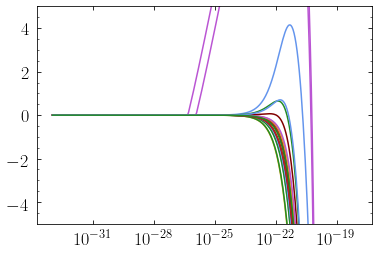

In [98]:
for imc in range(20):
    LL2 = np.load("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc0_inj10000_dm9/LL2_TSmx_lim_b_o1_mc"+str(imc)+".npz")['LL2'][52]
    xsecs = np.logspace(-33,-18,301)
    LL2 - LL2[0]
    plt.plot(xsecs, LL2 - LL2[0])
    plt.ylim(-5,5)
    plt.xscale("log")

In [93]:
np.log10(maxtss)

array([[         inf,  38.58906518,  32.91058975,  18.45305269,
         14.07093155],
       [         inf,  68.87767653,  61.38265368,  40.69395059,
         41.26069393],
       [         inf,  86.62036765,  81.82756862,  76.98703808,
         66.15682683]])

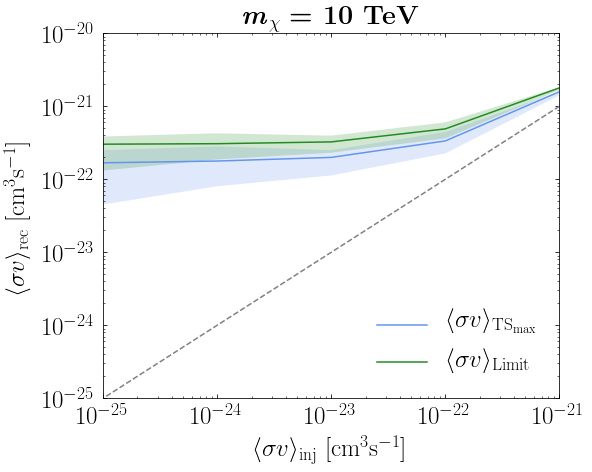

In [99]:
plot_h = 10/1.2
plot_w = 8/1.2

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))
plt.plot(np.logspace(-21,-25,5),  10**xsec_max[1], label='$\langle\sigma v \\rangle_\mathrm{TS_{max}}$')
plt.fill_between(np.logspace(-21,-25,5),  10**xsec_max[0], 10**xsec_max[2], alpha=0.2)
plt.plot(np.logspace(-21,-25,5),  10**lims[1], label='$\langle\sigma v \\rangle_\mathrm{Limit}$')
plt.fill_between(np.logspace(-21,-25,5),  10**lims[0], 10**lims[2], alpha=0.2)
plt.plot([10**-26,10**-20],[10**-26,10**-20],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]", fontsize=25)
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]", fontsize=25)
plt.ylim(10**-25,10**-20)
plt.xlim(10**-25,10**-21)
plt.xticks(fontsize=25);
plt.yticks(fontsize=25);
plt.yscale("log")
plt.xscale("log")
plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False, loc='lower right', fontsize=25)
plt.title("\\textbf{\emph{m}}$\mathbf{_\chi}$ \\textbf{= 10 TeV}", fontsize=27)
plt.tight_layout()
plt.savefig(plots_dir + "signal_recovery_10TeV.pdf")
plt.show()